# Importing necessary libraries

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

### loading Dataset and each column description is specified below
- **ID** - Customer ID
- **Age** - Customer's age in completed years.
- **Experience** - years of professional experience.
- **Income** - Annual income of the customer.
- **ZIPCode** - Home Address ZIP code.
- **Family** - Family size of the customer.
- **CCAvg** - Avg. spending on credit cards per month.
- **Education** - Education Level :
                1. Undergrad 
                2. Graduate 
                3. Advanced/Professional
- **Mortgage** - Value of house mortgage if any.
- **Personal Loan** - Did this customer accept the personal loan offered in the last campaign?
- **Securities Account** - Does the customer have a securities account with the bank?
- **CD Account** - Does the customer have a certificate of deposit (CD) account with the bank?
- **Online** - Does the customer use internet banking facilities?
- **CreditCard** - Does the customer use a credit card issued by UniversalBank?

In [2]:
loan = pd.read_csv('Bank_Personal_Loan_Modelling-1.csv')

## Head and Tail of dataset

In [3]:
loan.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [4]:
loan.tail(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4990,4991,55,25,58,95023,4,2.00,3,219,0,0,0,0,1
4991,4992,51,25,92,91330,1,1.90,2,100,0,0,0,0,1
4992,4993,30,5,13,90037,4,0.50,3,0,0,0,0,0,0
4993,4994,45,21,218,91801,2,6.67,1,0,0,0,0,1,0
4994,4995,64,40,75,94588,3,2.00,3,0,0,0,0,1,0
4995,4996,29,3,40,92697,1,1.90,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.40,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.30,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.50,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.80,1,0,0,0,0,1,1


### Shape of Dataset

In [5]:
loan.shape

(5000, 14)

Given dataset has **14 attributes** and **5000 records**.

### To check whether dataset contains null values

In [6]:
loan.isna().sum().sum()

0

In [7]:
loan.isnull().sum().sum()

0

No columns have null data in the file

In [8]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


### Using Describe function for stastical analysis of dataset

In [9]:
loan.drop(['ID'],axis = 1).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


In [10]:
loan.Experience.value_counts()

 32    154
 20    148
 9     147
 5     146
 23    144
 35    143
 25    142
 28    138
 18    137
 19    135
 26    134
 24    131
 3     129
 14    127
 16    127
 30    126
 34    125
 27    125
 17    125
 29    124
 22    124
 7     121
 8     119
 6     119
 15    119
 10    118
 33    117
 13    117
 11    116
 37    116
 36    114
 21    113
 4     113
 31    104
 12    102
 38     88
 39     85
 2      85
 1      74
 0      66
 40     57
 41     43
-1      33
-2      15
 42      8
-3       4
 43      3
Name: Experience, dtype: int64

### Observation from the above Describe and value_counts function

+ Minimum value in experience column is -3 and we can notice there are total 33, 15 and 4 values of -1, -2, -3 in experience columns which need to be corrected for analysis

### We are replacing the negative experience values with 0

In [11]:
neg_exp = list(loan.Experience[loan.Experience < 0])
loan.Experience.replace(neg_exp,0,inplace = True)

In [12]:
loan.drop(['ID'],axis = 1).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.119600,11.440484,0.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


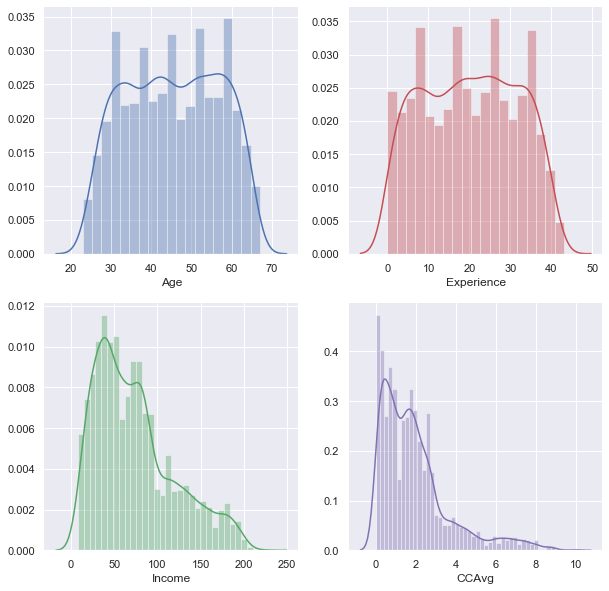

In [13]:
sns.set(style="darkgrid")
#Set up the matplotlib figure
f, axes = plt.subplots(2,2, figsize=(10, 10))
sns.despine(left=True)
sns.distplot(loan.Age, kde=True, color="b", ax=axes[0,0])
sns.distplot(loan.Experience, kde=True, color="r", ax=axes[0,1])
sns.distplot(loan.Income, kde=True, color="g", ax=axes[1,0])
sns.distplot(loan.CCAvg, kde=True, color="m", ax=axes[1,1]);

In [14]:
sns.distplot(loan.Mortgage,kde=True,color = 'c')
<matplotlib.axes._subplots.AxesSubplot at 0x211272f8e48>

SyntaxError: invalid syntax (<ipython-input-14-82fdadba2b09>, line 2)

In [ ]:
f, axes = plt.subplots(2,2, figsize=(10, 10))
sns.despine(left=True)
sns.boxplot(loan.Income, color="b", ax=axes[0,0])
sns.boxplot(loan.Experience, color="r", ax=axes[0,1])
sns.boxplot(loan.Age, color="g", ax=axes[1,0])
sns.boxplot(loan.CCAvg, color="m", ax=axes[1,1]);

+ Most of the customers age fall in the **age** range of **30 to 60 yrs** and their **experience** falls in the range of **5 to 35 years** and most earn an **income** between **35 dollor to 100 dollor**.
+ There are negative values in the Experience. This could be a data input error as in general it is not possible to measure negative years of experience.
+ Also their Average spending on credit cards per month lies between **0 to 2$** 

In [ ]:
sns.pairplot(loan.drop(['ID', 'ZIP Code'], axis = 1),hue = 'Personal Loan');

In [ ]:
loan.columns

In [ ]:
f, axes = plt.subplots(2,2, figsize=(15, 15))
sns.despine(left=True)
sns.boxplot(x="Education", y="Income", hue='Personal Loan',data=loan,color="b", ax=axes[0,0])
#sns.boxplot(x="CreditCard", y="Income",hue='Personal Loan', data=loan, color="r", ax=axes[0,1])
sns.boxplot(x="Family", y="Income",hue='Personal Loan', data=loan, color="g", ax=axes[1,0])
sns.boxplot(x="Education", y="Mortgage",hue='Personal Loan', data=loan, color="y", ax=axes[1,1])

### Observation from above Boxplots
- It seems the customers whose education level is 1 is having more income. However customers who has taken the personal loan have the same income levels also their income is higher than that of customer who have not taken loan.

- Income of is more of customer whose family size is small.

- Customer with higher mortgage seems to take personal loan.


In [ ]:
f, axes = plt.subplots(3,2, figsize=(10, 10))
sns.despine(left=True)
#print(loan.columns)
sns.countplot(x="Education",hue='Personal Loan', data=loan,ax=axes[0,0],palette='Set1')
sns.countplot(x="Family",hue='Personal Loan', data=loan,ax=axes[0,1],palette='Set2')
sns.countplot(x="Securities Account",hue='Personal Loan', data=loan,ax=axes[1,0],palette='Set3')
sns.countplot(x="CD Account",hue='Personal Loan', data=loan,ax=axes[1,1],palette='RdBu')
sns.countplot(x="Online",hue='Personal Loan', data=loan,ax=axes[2,0],palette='RdPu')
sns.countplot(x="CreditCard",hue='Personal Loan', data=loan,ax=axes[2,1],palette='PuBu')

### Observation from Categorical columns

- Family size and Education does not have any impact in personal loan. But it seems families with size of 3 are more likely to take loan. Graduate(2)  and Advanced/Professional(3) customers are more likely to opt loan as compared other. When considering future campaign this might be good association.
- Majority of customers who does not have loan have securities account and CD account.
- Online and CreditCard column does not have much impact on Personal Loan.

### Distribution of Target Column

In [ ]:
sns.countplot('Personal Loan', data= loan);
print(loan.groupby('Personal Loan').count()['CreditCard'])

* Out of 5000 customer very few customer have taken personal loan.
* only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(loan.drop(['ID', 'ZIP Code'], axis = 1).corr(),annot=True)

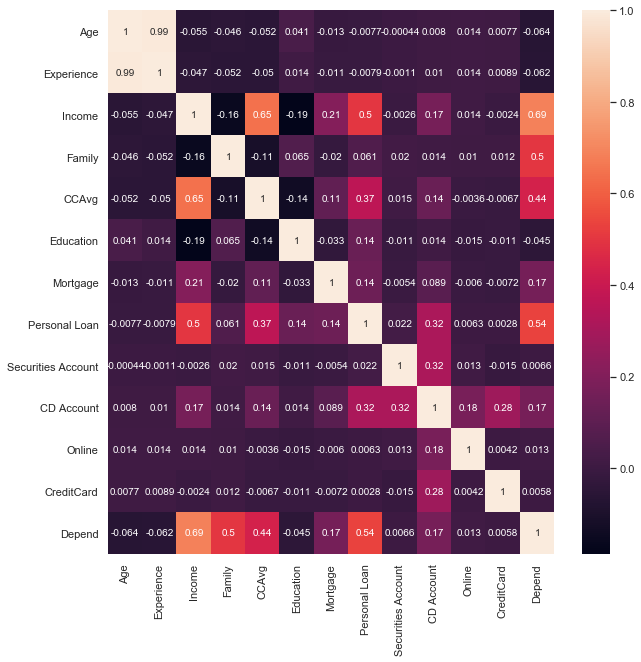

In [91]:
#loan['Depend'] = loan['Income']*loan['Family']

#sns.scatterplot('Depend','Income',data=loan,hue='Personal Loan')
plt.figure(figsize=(10,10))

sns.heatmap(loan.drop(['ID', 'ZIP Code'], axis = 1).corr(),annot=True)

### Split the dataset into training and test set in the ratio of 70:30 (Training:Test).

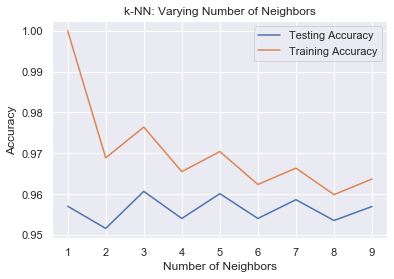

In [130]:
X=loan.drop(['Personal Loan','ID'],axis=1)
y=loan['Personal Loan']
neighbors = np.arange(1, 10)
train_accuracy_plot = np.empty(len(neighbors))
test_accuracy_plot = np.empty(len(neighbors))
# Loop over different values of k
for i, k in enumerate(neighbors):
    train = []
    test = []
    for j in range(20):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=j)
        sc=StandardScaler()
        scaledX_train = sc.fit_transform(X_train)
        scaledX_test = sc.transform(X_test)
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(scaledX_train,y_train)
        train.append(knn.score(scaledX_train,y_train))
        test.append(knn.score(scaledX_test,y_test))
    #Compute accuracy on the training set
    train_accuracy_plot[i] = np.mean(train)
    #Compute accuracy on the testing set
    test_accuracy_plot[i] = np.mean(test)
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy_plot, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy_plot, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

* In the above graph we can see that at the difference between training accuracy and testing accuracy is minimum at  Number of neighbors = 3 and 5.
* For final K-NN model we can use K-neighbor = 3.

### Building K-NN model to predict the likelihood of a liability customer buying personal loans.

In [123]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(scaledX_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

#### Training Accuracy of above K-NN Model

In [124]:
knn.score(scaledX_train,y_train)

0.9062857142857143

#### Testing Accuracy of above K-NN Model

In [125]:
knn.score(scaledX_test,y_test)

0.8846666666666667

###  Confusion matrix for K-NN model

In [126]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
predicted = knn.predict(X_test)
confusion_matrix(y_test,predicted)

array([[1372,    0],
       [ 128,    0]], dtype=int64)

In [127]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.91      1.00      0.96      1372
           1       0.00      0.00      0.00       128

    accuracy                           0.91      1500
   macro avg       0.46      0.50      0.48      1500
weighted avg       0.84      0.91      0.87      1500



> From confusion matrix we can say that model is predicting every class as 0 i.e. there is no customer who accepted personal loan.
>
> model is predicting that all the 1500 customer have not opted Personal Loan but actual there 152 customer who opted for Personal Loan.
>
> So K-NN is not working for this classification.

In [128]:
recall_score(y_test,predicted)

0.0

In [129]:
precision_score(y_test,predicted)

0.0